## Data collection

In [1]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import style


### Loading the data

we import the data for analysis. The dataset is split into train and testset. we will be validating based on the data from the training set and make predictions based on the test set.

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Titanic_dataset_classification/train.csv')
test_df =  pd.read_csv('/content/drive/MyDrive/Titanic_dataset_classification/test.csv')

In [5]:
all_data = pd.concat([train_df, test_df])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Data understanding using EDA

EDA is an intial investigation on data to discover pattern, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representataion.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training set has 891 rows, 10 features, target variable(survived). 2 of the features are float, 5 are integers, 5 are objects.

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from .describe() method we can see
1. 'Age' feature has some missing values
2. 38% out of the training set survived the Titanic
3. Passenger age range from 0.4 to 80 years old.
4.There's an outlier for the 'Fare' price. Because of the differences between the 75th percentile, std and the max value(512). we should drop that value. But we should also need further investigations.

### Exploring the missing values

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have found the missing values. but we want to see in percentage.

In [11]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = train_df.isnull().sum() / train_df.isnull().count() * 100
parcent_in_round = round(percent, 1)
missing_data = pd.concat([total, parcent_in_round], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


'Embarked' feature has only 2 missing values. so we can drop or filled that. 

'Age' feature has 177 missing values. It will be very tricky to work with this.

'Cavin' feature needs further investigation. Because it has 687 missing values which is 77.1% of the training dataset.

Another thing is noticable that some features such as **passengerId**, **Name**, **Ticket** would not doing any impact on survival rate.

### Dealing with outlier

For dealing with outlier we can use **sns.boxplot**

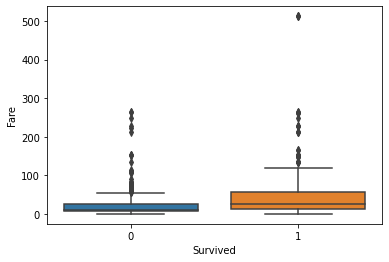

In [12]:
sns.boxplot(x='Survived', y='Fare', data=train_df)

passenger who paid over 300

In [13]:
train_df[train_df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


we should check captain's survival status. because it's his/her duty to save passenger or die trying.

In [14]:
train_df[train_df['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


we can see that the Captain's survival status is 0. which indicate that he died.

### Distribution of pclass and survived

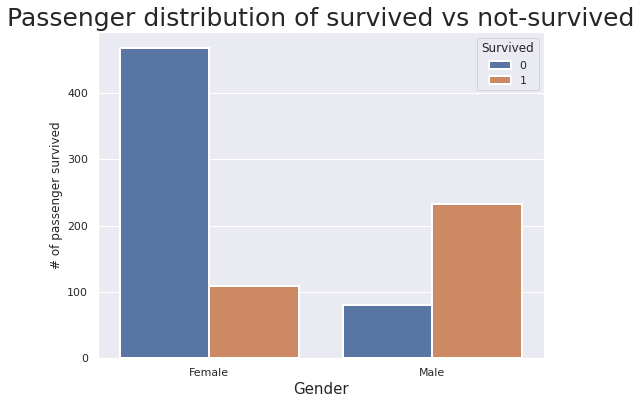

In [15]:
sns.set(style='darkgrid')
plt.subplots(figsize=(8,6))
ax=sns.countplot(x='Sex', data=train_df,hue='Survived', linewidth=2)

plt.title("Passenger distribution of survived vs not-survived", fontsize=25)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("# of passenger survived")
labels = ['Female', 'Male']

plt.xticks(sorted(train_df.Survived.unique()), labels);

In [16]:
train_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


74% female survived and 18% male survived.

Male and Female statistics

In [17]:
train_df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

women in the first and second class survived most. we can also see that male survived in first class survived 3 times than male in third class.

### Age and sex distribution

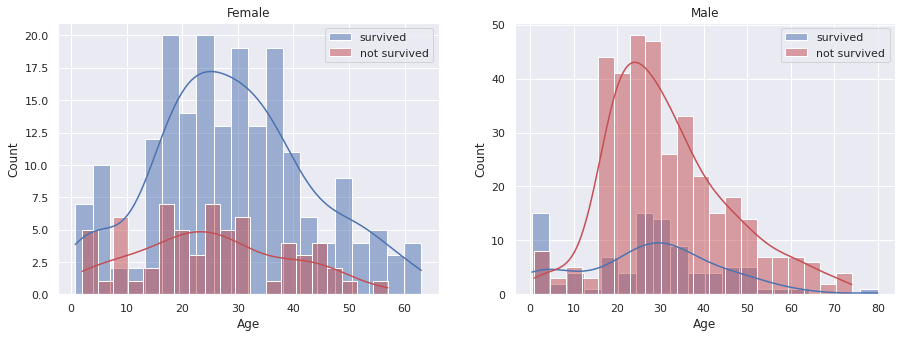

In [18]:
survived = 'survived'
not_survived = 'not survived'

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label=survived, ax=axes[0], color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label=not_survived, ax=axes[0], color='r', kde=True)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label=survived, ax=axes[1], color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label=not_survived, ax=axes[1], color='r', kde=True)
ax.legend()
ax.set_title('Male');

we can see that male have higher probabily of survival when they are between 18 and 35 years old. on the other hand women survival chances are higher between 15 and 40 years old.

For men, probability is very low between the ages of 5 to 18 and after 35.But  for women that isn't true. Another thing to note is that infants have a higher probabilty of survival.

### saving the children first

In [19]:
train_df[train_df['Age']<18].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

children below 18 years old have higher chances of surviving, proven they saved children first.

### Passenger class distribution: survived vs not_survived

Text(0.5, 1.0, 'Passenger class distribution - Survived vs Non-Survived')

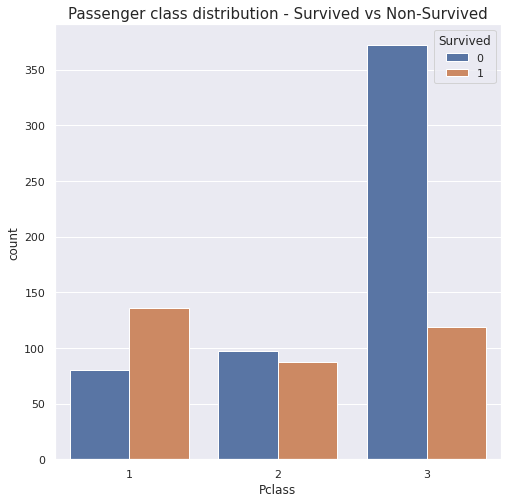

In [20]:
plt.subplots(figsize=(8,8))
ax=sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Passenger class distribution - Survived vs Non-Survived', fontsize=15)

Text(0.5, 1.0, 'passenger class distribution-survived passengers')

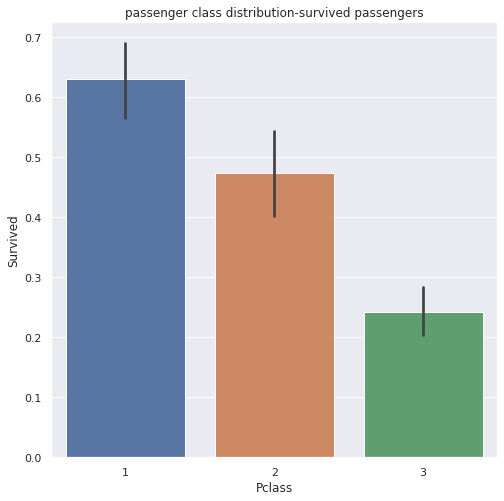

In [21]:
plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('passenger class distribution-survived passengers', fontsize=12)

The graphs above clearly shows that economic status played an important role regarding the potential survival of the titanic passengers.


*  63% of the 1st class passengers survived

*  48% of the 2nd class passsengers survived

*  24% of the 3rd class passengers survived




### Embarked, Pclass and Sex

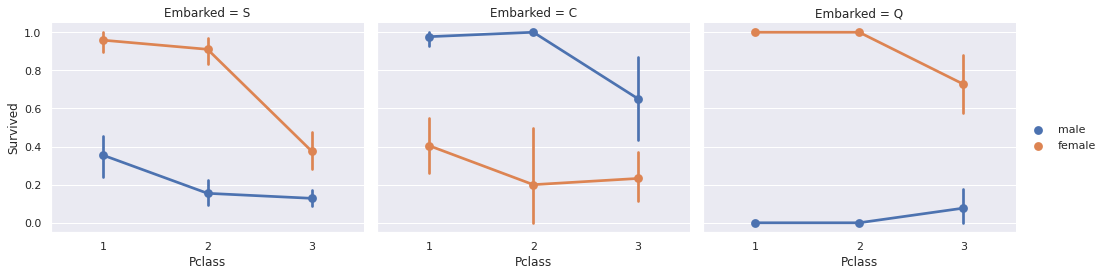

In [22]:
FacetGrid = sns.FacetGrid(train_df, col= 'Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

### Correaltion Matrix and Heatmap

In [23]:
# separate the numerical and categorical values 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

Text(0.5, 1.0, 'Correlations among numerical features.')

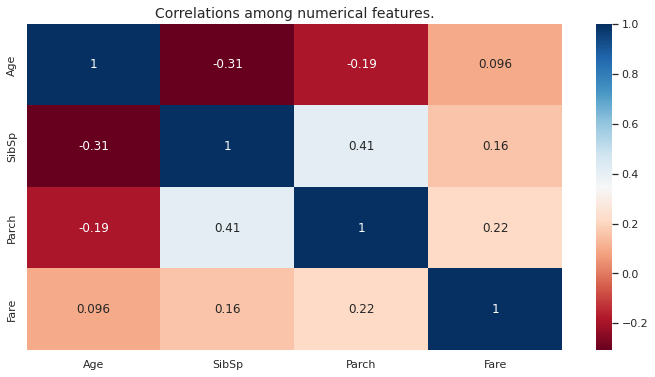

In [24]:
plt.subplots(figsize=(12, 6))
sns.heatmap(df_num.corr(),annot=True, cmap='RdBu')
plt.title('Correlations among numerical features.', fontsize=14)

From heatmap we can see
*  Age has a high negative correlation with number of siblings
*  parents and sibling like to travel together.

## Feature Engineering

Feature engineering is the process of using raw data to create features that will be used for predictive modeling. Using, transforming and combining existing features to define new features are also considered to be feature engineering.

### Drop the passengerId

In [25]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  combining sibsp and parch

sibsp and parch would make more sense as a combined feature that shows the total number of relatives a person has on the titanic. Will create the new feature 'relative' below and also a value that shows if someone is not alone. 

In [26]:
data = [train_df, test_df]

In [27]:
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] >0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

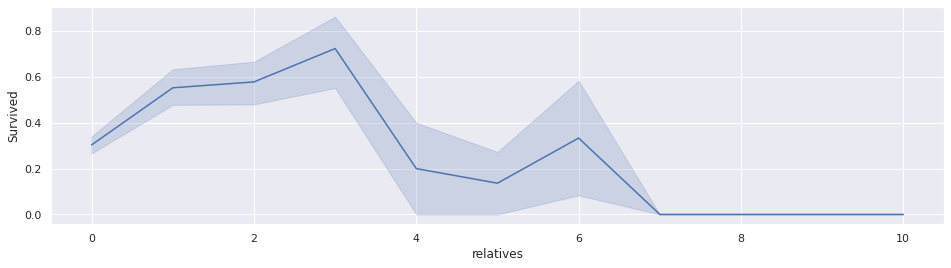

In [28]:
plt.subplots(figsize=(16,4))
ax = sns.lineplot(x='relatives', y='Survived', data=train_df)

## Missing data

### Cabin

In [29]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [30]:
train_df['Cabin'].isnull().sum()

687

There are lots of missing values of 'Cabin' feature. so, we should drop this.

In [31]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

## age

There are lot of missing 'Age' values. we can normalize the 'Age' feature by creating an array that contains random numbers, which are computed based on the mean age value in regard to the standard deviation and is_null.

In [32]:
data = [train_df, test_df]

for dataset in data:
  mean = train_df['Age'].mean()
  std = test_df['Age'].std()
  is_null = dataset['Age'].isnull().sum()

  # compute random age
  rand_age = np.random.randint(mean-std, mean+std, size=is_null)

  # fill nan values in age column with random values
  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['Age'] = age_slice
  dataset['Age'] = train_df['Age'].astype(int)

In [33]:
train_df['Age'].isnull().sum()

0

### Embarked

In [34]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
common_value  = 'S'

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [36]:
train_df['Embarked'].isnull().sum()

0

## Converting feature

### Fare

In [37]:
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

### Name

In [38]:
data = [train_df, test_df]
titles = {'Mr': 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
  # extract titles
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
  
  #replace titles with a more common title or other
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  #convert titles into numbers
  dataset['Title'] = dataset['Title'].map(titles)

  # filling NaN with 0
  dataset['Title'] = dataset['Title'].fillna(0)



In [39]:
train_df= train_df.drop(['Name'], axis=1)
test_df= test_df.drop(['Name'], axis=1)

In [40]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,2
3,1,1,female,35,1,0,113803,53,S,1,0,3
4,0,3,male,35,0,0,373450,8,S,0,1,1
5,0,3,male,38,0,0,330877,8,Q,0,1,1
6,0,1,male,54,0,0,17463,51,S,0,1,1
7,0,3,male,2,3,1,349909,21,S,4,0,4
8,1,3,female,27,0,2,347742,11,S,2,0,3
9,1,2,female,14,1,0,237736,30,C,1,0,3


### Sex

In [56]:
genders  = {'male': 0, 'female':1}

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

### Ticket

In [42]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [43]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

convert 'Embarked' feature into numeric values

In [44]:
data = [train_df, test_df]
ports = {'S': 0, 'C': 1, 'Q': 2}

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,0,0,1,0,1
1,1,1,1,5,1,0,5,1,1,0,3
2,1,3,1,3,0,0,0,0,0,1,2
3,1,1,1,5,1,0,5,0,1,0,3
4,0,3,0,5,0,0,1,0,0,1,1


## Creating new categories

### Age

In [46]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] < 11, 'Age'] = 0
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [47]:
train_df['Age'].value_counts()

4    172
6    162
5    145
3    139
2    115
1     90
0     68
Name: Age, dtype: int64

### Fare

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,0,0,1,0,1
1,1,1,1,5,1,0,5,1,1,0,3
2,1,3,1,3,0,0,0,0,0,1,2
3,1,1,1,5,1,0,5,0,1,0,3
4,0,3,0,5,0,0,1,0,0,1,1


In [49]:
pd.qcut(train_df['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                           (26.0, 52.0] < (52.0, 512.0]]

In [50]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,0,0,1,0,1
1,1,1,1,5,1,0,5,1,1,0,3
2,1,3,1,3,0,0,0,0,0,1,2
3,1,1,1,5,1,0,5,0,1,0,3
4,0,3,0,5,0,0,1,0,0,1,1


## Model building

In [103]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
x_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1).copy()

Stochastic Gradiant Descent

In [64]:
sgd_clf = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd_clf.fit(x_train, y_train)

y_pred = sgd_clf.predict(X_test)
sgd_clf.score(x_train, y_train)
acc_sgd = round(sgd_clf.score(x_train, y_train)* 100, 2)

print(round(acc_sgd, 2), '%')

77.44 %


Decission Tree

In [65]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train)*100, 2)

print(round(acc_decision_tree, 2), '%')

91.13 %


Random forest

In [66]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(X_test)

acc_rf_clf = round(rf_clf.score(x_train, y_train)*100, 2)

print(round(acc_rf_clf, 2), '%')

91.13 %


Logistic Regression

In [67]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

print(round(acc_log,2,), "%")

81.26 %


KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(x_train, y_train) * 100, 2)


print(round(acc_knn,2,), "%")

86.87 %


Gaussian Naive Bayes

In [69]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

print(round(acc_gaussian,2,), "%")

80.02 %


Perceptron

In [70]:
perceptron = Perceptron(max_iter=1000)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

print(round(acc_perceptron,2,), "%")

75.08 %


## Model Evaluation

Which one is the best model?

In [71]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_rf_clf, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.13,Random Forest
91.13,Decision Tree
86.87,KNN
81.26,Logistic Regression
80.02,Naive Bayes
77.44,Stochastic Gradient Decent
75.08,Perceptron


The random forest model goes up on top of the machine learning model.

### K-Fold cross validation

In [72]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

In [73]:
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.76666667 0.83146067 0.76404494 0.83146067 0.87640449 0.83146067
 0.82022472 0.78651685 0.85393258 0.82022472]
Mean: 0.8182397003745319
Standard Deviation: 0.034340321336384955


The Random Forest classifier model has an average accuracy of 81% with a standard deviation of 3.4%. The standard deviation tell us how precise the estimates are.

*  This means the accuracy of our model can differ ± 3.4%.

I believe the accuracy looks good. Since Random Forest is a model easy to use, we will try to increase its performance even further in the following section.

### Feature Importance

Another great quality of Random Forest is how easy it is to measure the relative importance of each feature. Sklearn is able to measure the importance of a features by looking at how much the tree nodes that are used by that particular feature reduce impurity on average across all trees in the forest. It computes this score automatically for each feature after training, and scales the results so that the sum of all importances is equal to 1

In [78]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(rf_clf.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

In [79]:
importances.head(12)

,importance
feature,
Title,0.225
Sex,0.188
Age,0.157
Fare,0.119
Pclass,0.108
relatives,0.068
Embarked,0.050
SibSp,0.045
Parch,0.026


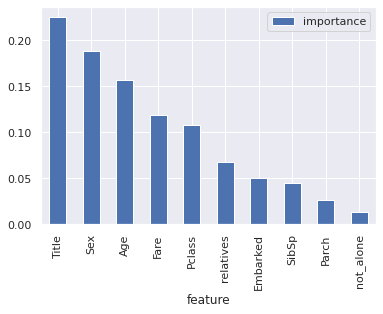

In [82]:
importances.plot.bar()

### Results

'not_alone' and 'Parch' don't play a significant role in the Random Forest classifiers prediction process. Thus, I will drop them from the DataFrame and train the classifier once again. We could also remove more features, however, this would inquire more investigations of the feature's effect on our model. For now, I will only remove 'not_alone' and 'Parch' from the DataFrame.

In [83]:
# dropping not_alone
train_df = train_df.drop(['not_alone'], axis=1)
test_df = test_df.drop(['not_alone'], axis=1)

# dropping parch
train_df = train_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)

In [84]:
## reassigning features
x_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1).copy()

Training random forest classifier once again.

In [86]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(x_train, y_train)*100, 2)

print(round(acc_random_forest, 2,), '%')

91.13 %


Feature importance without 'not_alone' and 'Parch' feature.

In [89]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

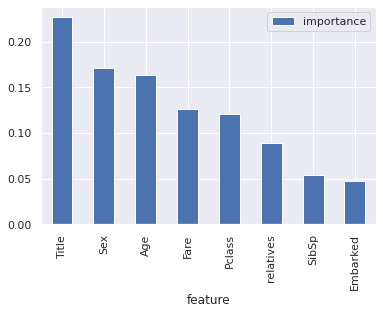

In [90]:
importances.plot.bar();

Moreover, there is another way to validate the Random Forest classifier, which is as accurate as the score used before. We can use something called Out of Bag (OOB) score to estimate the generalization accuracy. Basically, the OOB score is computed as the number of correctly predicted rows from the out of the bag sample.

In [100]:
print("oob score:", round(random_forest.oob_score_, 2)*100, "%")

oob score: 81.0 %


### Hyperparameter tuning

In [99]:
# performance report function
def clf_performance(classifier, model_name):
  print(model_name)
  print('Best score:', classifier.best_score_)
  print('Best parameters:', classifier.best_params_)

In [101]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['auto', 'sqrt', 10],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]

}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_clf_rf = clf_rf.fit(x_train, y_train)

clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

Random Forest
Best score: 0.8327537505492437
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 450}


### Testing new parameters

In [108]:
random_forest = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 15,
    max_features = 'auto',
    min_samples_leaf = 2,
    min_samples_split = 2, 
    n_estimators = 450, 
    random_state = 42, 
    oob_score = True,
    n_jobs = 1
)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(x_train, y_train)

print('OOB score: ', round(random_forest.oob_score_ ,2)*100, '%')

OOB score:  83.0 %


### Further Evaluation

Confusion Matrix

In [109]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[485,  64],
       [101, 241]])

*  First row is about the not-surived predictions. 485 passengers were correctly classifier as not survived and 64 were wrongly classified as not survived.

*  Second row is about the survived predictions. 101 passengers were wrongly classifier as survived and 241 passenger were correctly classified as survived.

*  A confusion matrix produces an idea of how accurate the model is.

#### Precision and Recall

In [112]:
from sklearn.metrics import precision_score, recall_score

print('Precision: ', precision_score(y_train, predictions))
print('Recall: ', recall_score(y_train, predictions))

Precision:  0.7901639344262295
Recall:  0.7046783625730995


Our model predicts correctly that a passenger survived 79% of the time (precision). The recall tells us that 70% of the passengers tested actually survived.

Precision Recall curve

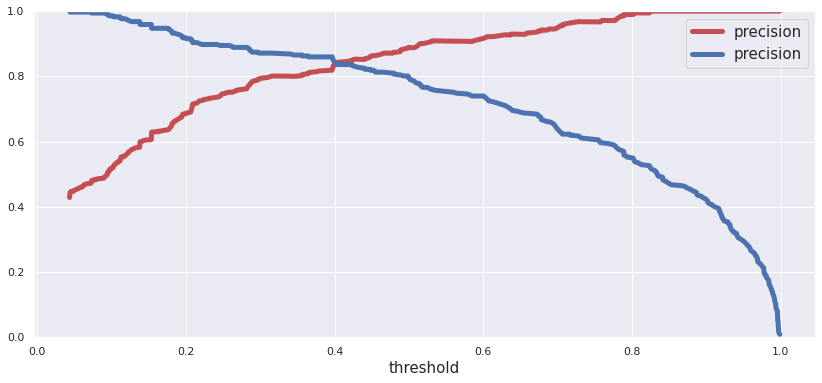

In [118]:
from sklearn.metrics._plot.precision_recall_curve import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:, 1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision ,recall, threshold):
  plt.plot(threshold, precision[:-1], 'r', label='precision', linewidth=5)
  plt.plot(threshold, recall[:-1], 'b', label='precision', linewidth=5)
  plt.xlabel('threshold', fontsize=15)
  plt.legend(loc='upper right', fontsize=15)
  plt.ylim(0, 1)

plt.figure(figsize=(14,6))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

We can see in the graph above that the recall is falling of rapidly when the precision reaches around 83%. Thus, we may want to select the precision/recall trade-off before this point (maybe at around 78%).

Now we are able to choose a threshold, that gives the best precision/recall trade-off for the current problem. For example, if a precision of 80% is required, we can easily look at the plot and identify the threshold needed, which is around 0.4. Then we could train the model with exactly that threshold and expect the desired accuracy.

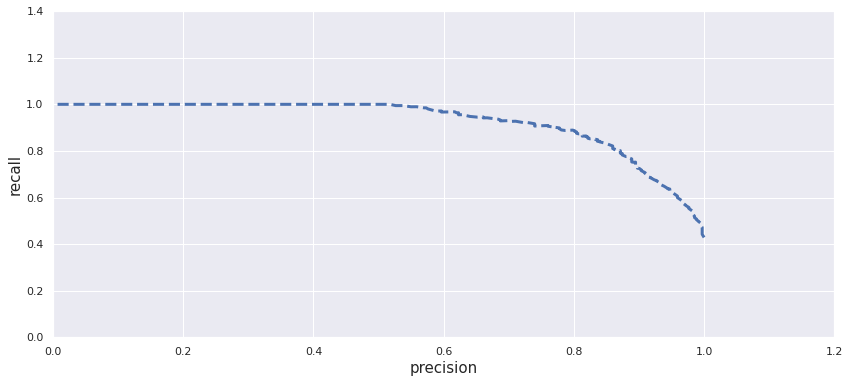

In [123]:
# another way to plot precision and recall against each other
def plot_precision_vs_recall(precision, recall):
  plt.plot(recall,precision, 'b--', linewidth=3)
  plt.xlabel('precision', fontsize=15)
  plt.ylabel('recall', fontsize=15)
  plt.axis([0, 1.2, 0, 1.4])

plt.figure(figsize=(14,6))
plot_precision_vs_recall(precision, recall)
plt.show()

we can easily see the threhold value poisition. same as precision_recall_threhold graph.

### ROC AUC Curve

Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances).

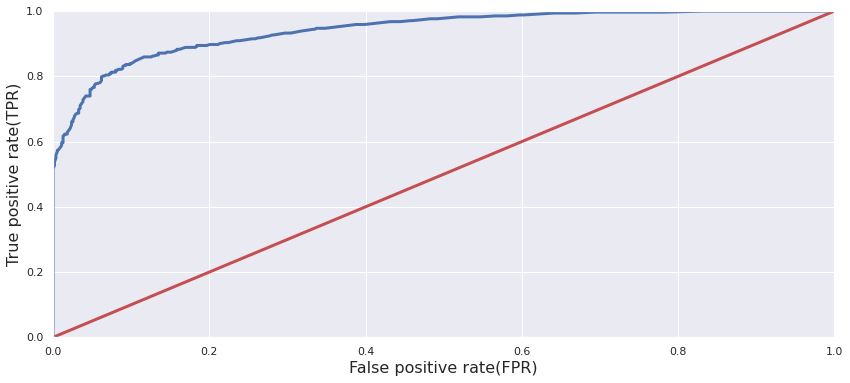

In [127]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, threholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=True):
  plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
  plt.plot([0, 1],  [0, 1], 'r', linewidth=3)
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False positive rate(FPR)', fontsize=16)
  plt.ylabel('True positive rate(TPR)', fontsize=16)

plt.figure(figsize=(14, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line represents a purely random classifier. Thus, the classifier should be as far away from it as possible. The Random Forest model looks good.

There's a tradeoff here because the classifier produces more false positives the higher the true positive rate is.

### Roc Auc Score

In [129]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print('Roc Auc Score: ', r_a_score)

Roc Auc Score:  0.9413021016414748


#### Final Datafram ####

In [130]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Title
0,0,3,0,2,1,0,0,1,1
1,1,1,1,5,1,5,1,1,3
2,1,3,1,3,0,0,0,0,2
3,1,1,1,5,1,5,0,1,3
4,0,3,0,5,0,1,0,0,1
5,0,3,0,5,0,1,2,0,1
6,0,1,0,6,0,4,0,0,1
7,0,3,0,0,3,3,0,4,4
8,1,3,1,3,0,2,0,2,3
9,1,2,1,1,1,4,1,1,3
